# Testing OBIM Components

We have several basic components that need independently verifying:

1. Rig Oscillators and Inverter Coupling Loops
2. The Oscillator Array
3. The AND Gate
4. The Half-Adder Gate
5. The Full-Adder Gate
6. Digital -> Oscillator Converter (DOC)
7. Oscillator -> Digital Converter (ODC)

For each component, we'd like to test to the following:

1. The internal structure of the Hdl21 `Instance`.
2. The component is working correctly in simulation.
3. That components *can* be integrated together.

### Inverter Coupling Loop

In [4]:
from ro import *
from ogates import *
from io_osc import *
import hdl21 as h

test = gen_coupling()
h.elaborate(test)
test = test.result

test.instances

{'resistor': Instance(name=resistor of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_pr__res_xhigh_po_0p35', port_list=[Signal(name='p', width=1, desc=None), Signal(name='n', width=1, desc=None), Signal(name='b', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130PrecResParams'>, desc='sky130 PDK Res3 sky130_fd_pr__res_xhigh_po_0p35', domain='sky130', spicetype=<SpiceType.SUBCKT: 'x'>), params=Sky130PrecResParams(l=100.0*UNIT, mult=1*UNIT, m=1*UNIT)))}

In [5]:
test.ports

{'A': Signal(name='A', width=1, desc=None),
 'B': Signal(name='B', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None)}

### Base Ring Oscillator

In [6]:
test = genRO(stages=3)
h.elaborate(test)
test = test.result 

test.instances

{'stage0': Instance(name=stage0 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__inv_1', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='Y', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky130_fd_sc_hd__inv_1 Logic Circuit', domain='sky130', spicetype=<SpiceType.SUBCKT: 'x'>), params=Sky130LogicParams(m=1*UNIT))),
 'stage1': Instance(name=stage1 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__inv_1', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='Y', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Dens

In [7]:
test.ports

{'links': Signal(name='links', width=3, desc='Oscillator output'),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'VDD': Signal(name='VDD', width=1, desc=None)}

In [8]:
test.stage0.conns

{'A': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=0),
 'Y': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=1),
 'VGND': Signal(name='VSS', width=1, desc=None),
 'VNB': Signal(name='VSS', width=1, desc=None),
 'VPWR': Signal(name='VDD', width=1, desc=None),
 'VPB': Signal(name='VDD', width=1, desc=None)}

In [9]:
test.stage1.conns

{'A': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=1),
 'Y': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=2),
 'VGND': Signal(name='VSS', width=1, desc=None),
 'VNB': Signal(name='VSS', width=1, desc=None),
 'VPWR': Signal(name='VDD', width=1, desc=None),
 'VPB': Signal(name='VDD', width=1, desc=None)}

In [10]:
test.stage2.conns

{'A': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=2),
 'Y': Slice(parent=Signal(name='links', width=3, desc='Oscillator output'), index=0),
 'VGND': Signal(name='VSS', width=1, desc=None),
 'VNB': Signal(name='VSS', width=1, desc=None),
 'VPWR': Signal(name='VDD', width=1, desc=None),
 'VPB': Signal(name='VDD', width=1, desc=None)}

### Oscillator Array

In [11]:
test = gen_ro_arr(stages=3, rows=3)
h.elaborate(test)
test = test.result

test.instances

{'rosc0': Instance(name=rosc0 of=GeneratorCall(gen=genRO)),
 'rosc1': Instance(name=rosc1 of=GeneratorCall(gen=genRO)),
 'rosc2': Instance(name=rosc2 of=GeneratorCall(gen=genRO))}

In [12]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'links': Signal(name='links', width=9, desc=None)}

In [13]:
test.rosc2.conns

{'links': Slice(parent=Signal(name='links', width=9, desc=None), index=slice(6, 9, None)),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'VDD': Signal(name='VDD', width=1, desc=None)}

### AND Gate

In [14]:
test = oAND
h.elaborate(test)
test = test.result

test.instances

{'AND_ogate': Instance(name=AND_ogate of=Module(name=AND))}

In [15]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'REF': Signal(name='REF', width=1, desc=None),
 'A': Signal(name='A', width=1, desc=None),
 'B': Signal(name='B', width=1, desc=None),
 'C': Signal(name='C', width=1, desc=None)}

In [16]:
test.instances['AND_ogate'].conns['links'].parts

(Signal(name='kernel', width=1, desc=None),
 Signal(name='padding0', width=7, desc=None),
 Signal(name='A', width=1, desc=None),
 Signal(name='padding1', width=8, desc=None),
 Signal(name='B', width=1, desc=None),
 Signal(name='padding2', width=8, desc=None),
 Signal(name='C', width=1, desc=None),
 Signal(name='padding3', width=8, desc=None),
 Signal(name='REF', width=1, desc=None))

### Half-Adder Gate

In [17]:
test = oHA
h.elaborate(test)
test = test.result

test.instances

{'HA_ogate': Instance(name=HA_ogate of=Module(name=HA))}

In [18]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'REF': Signal(name='REF', width=1, desc=None),
 'A': Signal(name='A', width=1, desc=None),
 'B': Signal(name='B', width=1, desc=None),
 'S': Signal(name='S', width=1, desc=None),
 'C': Signal(name='C', width=1, desc=None)}

In [19]:
test.instances['HA_ogate'].conns['links'].parts

(Signal(name='kernel', width=1, desc=None),
 Signal(name='padding0', width=7, desc=None),
 Signal(name='A', width=1, desc=None),
 Signal(name='padding1', width=8, desc=None),
 Signal(name='B', width=1, desc=None),
 Signal(name='padding2', width=8, desc=None),
 Signal(name='S', width=1, desc=None),
 Signal(name='padding3', width=8, desc=None),
 Signal(name='C', width=1, desc=None),
 Signal(name='padding4', width=8, desc=None),
 Signal(name='REF', width=1, desc=None))

### Full-Adder Gate

In [20]:
test = oFA
h.elaborate(test)
test = test.result

In [21]:
test.instances

{'FA_ogate': Instance(name=FA_ogate of=Module(name=FA))}

In [22]:
test.ports

{'VDD': Signal(name='VDD', width=1, desc=None),
 'VSS': Signal(name='VSS', width=1, desc=None),
 'REF': Signal(name='REF', width=1, desc=None),
 'A': Signal(name='A', width=1, desc=None),
 'B': Signal(name='B', width=1, desc=None),
 'Cin': Signal(name='Cin', width=1, desc=None),
 'S': Signal(name='S', width=1, desc=None),
 'Cout': Signal(name='Cout', width=1, desc=None)}

In [23]:
test.instances['FA_ogate'].conns['links'].parts

(Signal(name='kernel', width=1, desc=None),
 Signal(name='padding0', width=7, desc=None),
 Signal(name='A', width=1, desc=None),
 Signal(name='padding1', width=8, desc=None),
 Signal(name='B', width=1, desc=None),
 Signal(name='padding2', width=8, desc=None),
 Signal(name='Cin', width=1, desc=None),
 Signal(name='padding3', width=8, desc=None),
 Signal(name='S', width=1, desc=None),
 Signal(name='padding4', width=8, desc=None),
 Signal(name='Cout', width=1, desc=None),
 Signal(name='padding5', width=8, desc=None),
 Signal(name='REF', width=1, desc=None))

### Digital -> Oscillator Converter (DOC)

In [24]:
test = gen_in_osc(stages=7, n_bits=3)
h.elaborate(test)
test = test.result

test.instances

{'in_xor1': Instance(name=in_xor1 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__xor2_1', port_list=[Signal(name='A', width=1, desc=None), Signal(name='B', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky130_fd_sc_hd__xor2_1 Logic Circuit', domain='sky130', spicetype=<SpiceType.SUBCKT: 'x'>), params=Sky130LogicParams(m=1*UNIT))),
 'in_xor2': Instance(name=in_xor2 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__xor2_1', port_list=[Signal(name='A', width=1, desc=None), Signal(name='B', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=N

In [25]:
test.ports, test.signals

({'IN': Signal(name='IN', width=3, desc=None),
  'OUT': Signal(name='OUT', width=3, desc=None),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None),
  'REF': Signal(name='REF', width=1, desc=None)},
 {'OSC_CTRL': Signal(name='OSC_CTRL', width=4, desc=None),
  'OSC_CTRL_B': Signal(name='OSC_CTRL_B', width=4, desc=None),
  'osc_arr_links': Signal(name='osc_arr_links', width=28, desc=None)})

In [26]:
test.osc_arr.of.result.instances

{'rosc0': Instance(name=rosc0 of=GeneratorCall(gen=genRO)),
 'rosc1': Instance(name=rosc1 of=GeneratorCall(gen=genRO)),
 'rosc2': Instance(name=rosc2 of=GeneratorCall(gen=genRO)),
 'rosc3': Instance(name=rosc3 of=GeneratorCall(gen=genRO))}

In [27]:
test.in_xor1.conns, test.in_xor2.conns, test.in_final_buf.conns

AttributeError: 'Module' object has no attribute 'in_final_buf'

In [ ]:
test.einvp0.conns, test.einvp1.conns, test.einvp2.conns

({'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=0),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=7),
  'EN': Slice(parent=Signal(name='OSC_CTRL_B', width=3, desc=None), index=0),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=8),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=15),
  'EN': Slice(parent=Signal(name='OSC_CTRL_B', width=3, desc=None), index=1),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=14),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=21),
  'EN': Slice(parent=Signal(name='OSC_CTRL_B', width=3, desc=None), index=2),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', wi

In [ ]:
test.einvn0.conns, test.einvn1.conns, test.einvn2.conns

({'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=2),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=10),
  'EN': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=0),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=9),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=17),
  'EN': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=1),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=16),
  'B': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=24),
  'EN': Slice(parent=Signal(name='OSC_CTRL', width=3, desc=None), index=2),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1

In [ ]:
test.outbuf0.conns, test.outbuf1.conns, test.outbuf2.conns

({'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=6),
  'X': Slice(parent=Signal(name='OUT', width=3, desc=None), index=0),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=13),
  'X': Slice(parent=Signal(name='OUT', width=3, desc=None), index=1),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='osc_arr_links', width=28, desc=None), index=20),
  'X': Slice(parent=Signal(name='OUT', width=3, desc=None), index=2),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None)

### Oscillator -> Digital Converter (ODC)

In [ ]:
test = gen_out_osc(stages=7, n_bits=3)
h.elaborate(test)
test = test.result

test.instances

{'buf0': Instance(name=buf0 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__buf_1', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky130_fd_sc_hd__buf_1 Logic Circuit', domain='sky130', spicetype=<SpiceType.SUBCKT: 'x'>), params=Sky130LogicParams(m=1*UNIT))),
 'buf1': Instance(name=buf1 of=ExternalModuleCall(module=ExternalModule(name='sky130_fd_sc_hd__buf_1', port_list=[Signal(name='A', width=1, desc=None), Signal(name='VGND', width=1, desc=None), Signal(name='VNB', width=1, desc=None), Signal(name='VPB', width=1, desc=None), Signal(name='VPWR', width=1, desc=None), Signal(name='X', width=1, desc=None)], paramtype=<class 'sky130_hdl21.pdk_data.Sky130LogicParams'>, desc='High Density sky1

In [ ]:
test.ports, test.signals

({'IN': Signal(name='IN', width=3, desc=None),
  'REF': Signal(name='REF', width=1, desc=None),
  'OUT': Signal(name='OUT', width=3, desc=None),
  'VSS': Signal(name='VSS', width=1, desc=None),
  'VDD': Signal(name='VDD', width=1, desc=None),
  'CLK': Signal(name='CLK', width=1, desc=None)},
 {'XORS': Signal(name='XORS', width=3, desc=None),
  'FF': Signal(name='FF', width=3, desc=None)})

In [ ]:
test.buf0.conns, test.xor0.conns, test.ff0.conns

({'A': Slice(parent=Signal(name='IN', width=3, desc=None), index=0),
  'X': Slice(parent=Signal(name='XORS', width=3, desc=None), index=0),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'A': Slice(parent=Signal(name='XORS', width=3, desc=None), index=0),
  'B': Signal(name='REF', width=1, desc=None),
  'X': Slice(parent=Signal(name='FF', width=3, desc=None), index=0),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, desc=None),
  'VPWR': Signal(name='VDD', width=1, desc=None),
  'VPB': Signal(name='VDD', width=1, desc=None)},
 {'D': Slice(parent=Signal(name='FF', width=3, desc=None), index=0),
  'Q': Slice(parent=Signal(name='OUT', width=3, desc=None), index=0),
  'CLK': Signal(name='CLK', width=1, desc=None),
  'VGND': Signal(name='VSS', width=1, desc=None),
  'VNB': Signal(name='VSS', width=1, 

### Simulation

For the purposes of simulation, we'll only be creating the following testbeches:

1. Digital-to-Oscillator IO
2. Oscillator-to-Digital IO
3. All our oscillator gates

Specifically we want to test them across a wide-range of circumstances, so we'll be looking at:

1. Temperature Changes
2. Supply Voltage Noise
3. Process Variation

We're not all that concerned with jitter as the circuit is supposed to take advantage of jitter to compute, but frequency differences between oscillators can introduce unwanted phase drift which could mess up the underlying model of computation.

### Digital-to-Oscillator IO

In [1]:
from ogates import *
from io_osc import *
import sky130_hdl21 as sky130
from sitepdks import *
import vlsirtools.spice as vsp
import hdl21 as h
from hdl21.prefix import n, p

@h.sim.sim
class oAND_Sim:

    @h.module
    class Tb:

        # Instantiate power supplies, enable signal and reference signal
        VSS = h.Port()
        VDD = h.Signal()
        vdd  = h.PulseVoltageSource(
            delay=0,
            v1=0,
            v2=1.8,
            period=0,
            rise=10*n,
            fall=1*n,
            width=1
        )(p=VDD,n=VSS)
        REF = h.Signal()
        vout = h.Signal(width=8)

        stages = 9

        # Instantiate input vsources and oscillators and output phase detector
        DIGITAL_IN = digital_signal(width=8,inp=85)(VSS=VSS)
        IN  = gen_in_osc(stages=stages,n_bits=8)(VSS=VSS, VDD=VDD,REF=REF,IN=DIGITAL_IN.vout,OUT=vout)

    # Simulation Controls
    tran = h.sim.Tran(tstop=50*n, tstep=1*p)
    inc_base = sky130.install.include(h.pdk.Corner.TYP)
    inc_cells = h.sim.Include(
            sky130.install.pdk_path /
            "libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice"
    )

opts = vsp.SimOptions(
        simulator=vsp.SupportedSimulators.NGSPICE,
        fmt=vsp.ResultFormat.SIM_DATA,
        rundir="./scratch",
    )

rv = oAND_Sim.run(opts)
op = rv[vsp.sim_data.AnalysisType.TRAN]

In [2]:
for k in op.data.keys():
    print(k)

time
v(xtop.vdd)
v(xtop.digital_in_vout_0)
v(xtop.digital_in_vout_1)
v(xtop.digital_in_vout_2)
v(xtop.digital_in_vout_3)
v(xtop.digital_in_vout_4)
v(xtop.digital_in_vout_5)
v(xtop.digital_in_vout_6)
v(xtop.digital_in_vout_7)
v(xtop.xin.osc_arr_links_0)
v(xtop.xin.osc_arr_links_1)
v(xtop.xin.osc_arr_links_2)
v(xtop.xin.osc_arr_links_3)
v(xtop.xin.osc_arr_links_4)
v(xtop.xin.osc_arr_links_5)
v(xtop.xin.osc_arr_links_6)
v(xtop.xin.osc_arr_links_7)
v(xtop.xin.osc_arr_links_8)
v(xtop.xin.osc_arr_links_9)
v(xtop.xin.osc_arr_links_10)
v(xtop.xin.osc_arr_links_11)
v(xtop.xin.osc_arr_links_12)
v(xtop.xin.osc_arr_links_13)
v(xtop.xin.osc_arr_links_14)
v(xtop.xin.osc_arr_links_15)
v(xtop.xin.osc_arr_links_16)
v(xtop.xin.osc_arr_links_17)
v(xtop.xin.osc_arr_links_18)
v(xtop.xin.osc_arr_links_19)
v(xtop.xin.osc_arr_links_20)
v(xtop.xin.osc_arr_links_21)
v(xtop.xin.osc_arr_links_22)
v(xtop.xin.osc_arr_links_23)
v(xtop.xin.osc_arr_links_24)
v(xtop.xin.osc_arr_links_25)
v(xtop.xin.osc_arr_links_26)
v(

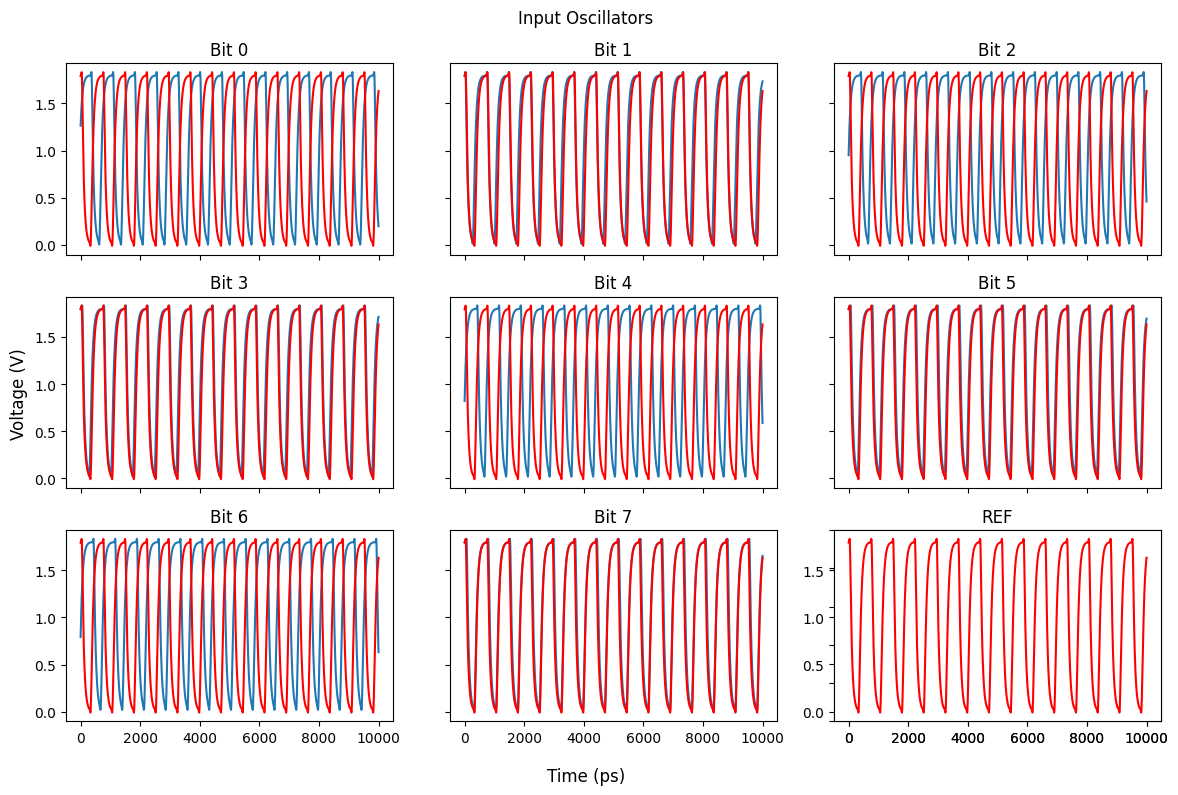

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(12, 8), sharex=True)

start = -10000
stop = -1

axs[0, 0].plot(op.data['v(xtop.vout_0)'][start:stop])
axs[0, 0].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[0, 0].set_title('Bit 0')

axs[0, 1].plot(op.data['v(xtop.vout_1)'][start:stop])
axs[0, 1].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[0, 1].set_title('Bit 1')

axs[0, 2].plot(op.data['v(xtop.vout_2)'][start:stop])
axs[0, 2].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[0, 2].set_title('Bit 2')

axs[1, 0].plot(op.data['v(xtop.vout_3)'][start:stop])
axs[1, 0].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[1, 0].set_title('Bit 3')

axs[1, 1].plot(op.data['v(xtop.vout_4)'][start:stop])
axs[1, 1].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[1, 1].set_title('Bit 4')

axs[1, 2].plot(op.data['v(xtop.vout_5)'][start:stop])
axs[1, 2].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[1, 2].set_title('Bit 5')

axs[2, 0].plot(op.data['v(xtop.vout_6)'][start:stop])
axs[2, 0].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[2, 0].set_title('Bit 6')

axs[2, 1].plot(op.data['v(xtop.vout_7)'][start:stop])
axs[2, 1].plot(op.data['v(xtop.ref)'][start:stop],color='red')
axs[2, 1].set_title('Bit 7')

# Create a new subplot for REF
ax_ref = fig.add_subplot(3, 3, 9)
ax_ref.plot(op.data['v(xtop.ref)'][start:stop],color='red')
ax_ref.set_title('REF')

# Remove x-axis labels from all but the last row of subplots
for ax in axs.flat:
    if ax != axs[-1, 0] and ax != axs[-1, 1] and ax != axs[-1, 2]:
        ax.label_outer()

# Remove y-axis labels from all but the first column of subplots
for ax in axs.flat:
    if ax != axs[0, 0] and ax != axs[1, 0] and ax != axs[2, 0]:
        ax.label_outer()

# Set common x and y labels
fig.supxlabel('Time (ps)')
fig.supylabel('Voltage (V)')

# Add a legend to the last subplot (bottom-right corner)
axs[-1, -1].legend([f"bit {i}" for i in range(8)] + ['VDD'])

plt.suptitle('Input Oscillators')
plt.tight_layout()
plt.show()


### AND Gate

In [ ]:
from ogates import *
from io_osc import *
import sky130_hdl21 as sky130
from sitepdks import *
import vlsirtools.spice as vsp
import hdl21 as h
from hdl21.prefix import n, p

@h.sim.sim
class oAND_Sim:

    @h.module
    class Tb:

        # Instantiate power supplies, enable signal and reference signal
        VSS = h.Port()
        VDD = h.Signal()
        vdd  = h.PulseVoltageSource(
            delay=0,
            v1=0,
            v2=1.8,
            period=0,
            rise=10*n,
            fall=1*n,
            width=1
        )(p=VDD,n=VSS)
        REF = h.Signal()
        A,B,C = 3 * h.Signal()

        stages = 9

        # Instantiate input vsources and oscillators and output phase detector
        J = ((0, -2, 4, 1), (-2, 0, 4, 1), (4, 4, 0, -2), (1, 1, -2, 0))
        nodes = ("A", "B", "C", "AUX")
        oAND = gen_ogate(stages=stages, node_names=nodes, couplings=J, gate_name="AND")

        AND = oAND(VSS=VSS,VDD=VDD,A=A,B=B,C=C,REF=REF)

    # Simulation Controls
    tran = h.sim.Tran(tstop=20*n, tstep=1*p)
    inc_base = sky130.install.include(h.pdk.Corner.TYP)
    inc_cells = h.sim.Include(
            sky130.install.pdk_path /
            "libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice"
    )

opts = vsp.SimOptions(
        simulator=vsp.SupportedSimulators.NGSPICE,
        fmt=vsp.ResultFormat.SIM_DATA,
        rundir="./scratch",
    )

rv = oAND_Sim.run(opts)
op = rv[vsp.sim_data.AnalysisType.TRAN]

In [ ]:
for k in op.data.keys():
    print(k)

time
v(xtop.vdd)
v(xtop.ref)
v(xtop.xand.padding3_0)
v(xtop.xand.padding3_1)
v(xtop.xand.padding3_2)
v(xtop.xand.padding3_3)
v(xtop.xand.padding3_4)
v(xtop.xand.padding3_5)
v(xtop.xand.padding3_6)
v(xtop.xand.padding3_7)
v(xtop.c)
v(xtop.xand.padding2_0)
v(xtop.xand.padding2_1)
v(xtop.xand.padding2_2)
v(xtop.xand.padding2_3)
v(xtop.xand.padding2_4)
v(xtop.xand.padding2_5)
v(xtop.xand.padding2_6)
v(xtop.xand.padding2_7)
v(xtop.b)
v(xtop.xand.padding1_0)
v(xtop.xand.padding1_1)
v(xtop.xand.padding1_2)
v(xtop.xand.padding1_3)
v(xtop.xand.padding1_4)
v(xtop.xand.padding1_5)
v(xtop.xand.padding1_6)
v(xtop.xand.padding1_7)
v(xtop.a)
v(xtop.xand.padding0_0)
v(xtop.xand.padding0_1)
v(xtop.xand.padding0_2)
v(xtop.xand.padding0_3)
v(xtop.xand.padding0_4)
v(xtop.xand.padding0_5)
v(xtop.xand.padding0_6)
v(xtop.xand.kernel)
v(xtop.xand.xand_ogate.xab_coupling.xresistor.xsky130_fd_pr__res_xhigh_po_0p35.ra)
v(xtop.xand.xand_ogate.xac_coupling.xresistor.xsky130_fd_pr__res_xhigh_po_0p35.ra)
v(xtop.xand

In [ ]:
import matplotlib.pyplot as plt

plt.plot(op.data['v(xtop.a)'][18000:])
plt.plot(op.data['v(xtop.b)'][18000:])
plt.plot(op.data['v(xtop.c)'][18000:])
plt.plot(op.data['v(xtop.ref)'][18000:])
plt.plot(op.data['v(xtop.vdd)'][18000:], '--')
# plt.plot(op.data['v(xtop.xin)'][-10000:])
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (V)')
plt.legend(['A Oscillator', 'B Oscillator', 'C Oscillator', 'Reference', 'VDD'])
plt.title('Input Oscillators')

NameError: name 'op' is not defined

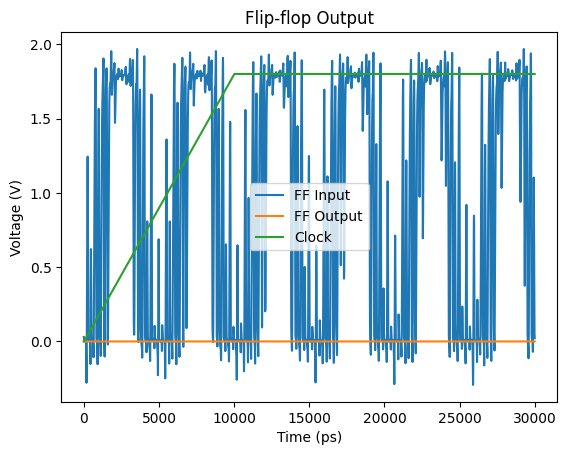

In [ ]:
plt.plot(op.data['v(xtop.xout.ff)'][90000:120000])
plt.plot(op.data['v(xtop.vout)'][90000:120000])
plt.plot(op.data['v(xtop.clk)'][90000:120000])
plt.xlabel('Time (ps)')
plt.ylabel('Voltage (V)')
plt.title('Flip-flop Output')
plt.legend(['FF Input', 'FF Output', 'Clock'])